NameError: ignored

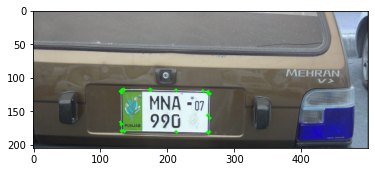

In [0]:
import numpy as np
import cv2
import  imutils
import matplotlib.pyplot as plt
# Read the image file
image = cv2.imread('Screenshot (464).png')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

# Display the original image
#plt.imshow(image)


# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)


# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
#cv2_imshow(gray)


# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
#cv2_imshow(edged)

# Find contours based on Edges
(cnts, heirarchy) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = 0 #we currently have no Number plate contour

# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            break

miny=min(NumberPlateCnt.T[1][0])
maxy=max(NumberPlateCnt.T[1][0])
minx=min(NumberPlateCnt.T[0][0])
maxx=max(NumberPlateCnt.T[0][0])

Plate=image[miny:maxy, minx:maxx]


# Drawing the selected contour on the original image
cv2.drawContours(image, cnts[0], -1, (0,255,0), 3)
plt.imshow(image)

cv2_imshow(Plate)
cv2.waitKey(0) #Wait for user input before closing the images displayed

In [0]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Plate Colorized


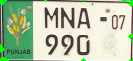

Plate In BlacknWhite


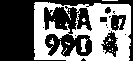

In [0]:
import cv2
from google.colab.patches import cv2_imshow


#img = cv2.imread('/content/174px-Pakistan_-_License_Plate_-_Punjab.png')
img = Plate

print('Plate Colorized')
cv2_imshow(img)
newimg=img.copy()  
for i in range(len(newimg)):
  for j in range(len(newimg[i])):
    if newimg[i][j][0]>220 and newimg[i][j][1]>220 and newimg[i][j][2]>220:
      newimg[i][j][0]=255
      newimg[i][j][1]=255
      newimg[i][j][2]=255
    else:
      newimg[i][j][0]=0
      newimg[i][j][1]=0
      newimg[i][j][2]=0
    
print('Plate In BlacknWhite')
cv2_imshow(newimg)


In [0]:

####https://github.com/pavankalyan1997/Machine-learning-without-any-libraries/blob/master/9.%20Deep%20Neural%20Network/Digit%20Recognition%20from%200-9%20from%20Scratch%20using%20Deep%20Neural%20network.ipynb

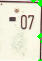

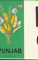

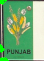

In [0]:
  img=Plate
  cv2.setUseOptimized(True)
  cv2.setNumThreads(8)

  gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  gs.setBaseImage(img)

    #gs.switchToSingleStrategy()
    #gs.switchToSelectiveSearchFast()
  gs.switchToSelectiveSearchQuality()


  rects = gs.process()
  nb_rects = 70

  wimg = img.copy()
  croppedimages=[]
  widths=[]
  heights=[]
  xs=[]
  ys=[]

  for i in range(len(rects)):
                if (i < nb_rects):
                    x, y, w, h = rects[i]
                    if h/w>1.3 and h/w <1.7:
                      #cv2.rectangle(wimg, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                      croppedimages.append(wimg[y:y+h, x:x+w])
                      cv2_imshow(wimg[y:y+h, x:x+w])
                      widths.append(w)
                      heights.append(h)
                      xs.append(x)
                      ys.append(y)
  #cv2_imshow(wimg)
  c = cv2.waitKey()
                      #cv2.imwrite('/content/drive/My Drive/PakiNumPlates2/'+str(count)+'.jpg', wimg[y:y+h, x:x+w]) 
                      #count+=1


In [0]:
#!git clone https://github.com/apoorva-dave/LicensePlateDetector.git

In [0]:
!git clone https://github.com/femioladeji/License-Plate-Recognition-Nigerian-vehicles.git

Cloning into 'License-Plate-Recognition-Nigerian-vehicles'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1124 (delta 0), reused 0 (delta 0), pack-reused 1121
Receiving objects: 100% (1124/1124), 662.58 KiB | 733.00 KiB/s, done.
Resolving deltas: 100% (822/822), done.


In [0]:
import os
def getFilesInDir(dir):
    lst = [] # Empty array
    
    for file in os.listdir(dir):
        lst.append(file) # will append names of files one by one.
    return lst

Numbers=getFilesInDir('/content/License-Plate-Recognition-Nigerian-vehicles/training_data/train20X20')

Data=[]
Labels=[]
Data_Chars=[]
Labels_Chars=[]

for EachFolder in Numbers:
  EachFile = getFilesInDir('/content/License-Plate-Recognition-Nigerian-vehicles/training_data/train20X20'+'/'+EachFolder)
  for EachImage in range(len(EachFile)):
    temp=cv2.imread('/content/License-Plate-Recognition-Nigerian-vehicles/training_data/train20X20'+'/'+EachFolder+'/'+EachFile[EachImage])
    for i in range(len(temp)):
        for j in range(len(temp[i])):
          if temp[i][j][0]>220 and newimg[i][j][1]>220 and newimg[i][j][2]>220:
            temp[i][j][0]=0
            temp[i][j][1]=0
            temp[i][j][2]=0
          else:
            temp[i][j][0]=255
            temp[i][j][1]=255
            temp[i][j][2]=255
    if EachFolder>='0' and EachFolder<='9':
      Data.append(temp)
      Labels.append(EachFolder)
    else:
      Data_Chars.append(temp)
      Labels_Chars.append(EachFolder)




In [0]:
!wget https://raw.githubusercontent.com/GuiltyNeuron/ANPR/master/Licence_plate_recognition/USA_plates/dataset.zip
'''#!wget http://www.iapr-tc11.org/dataset/SVHN/train_32x32.mat
#!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz
#!wget http://ai.stanford.edu/~btaskar/ocr/letter.data.gz
#!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
'''

--2020-06-01 16:12:52--  https://raw.githubusercontent.com/GuiltyNeuron/ANPR/master/Licence_plate_recognition/USA_plates/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36831162 (35M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  35.12M  47.3MB/s    in 0.7s    

2020-06-01 16:12:54 (47.3 MB/s) - ‘dataset.zip’ saved [36831162/36831162]



'#!wget http://www.iapr-tc11.org/dataset/SVHN/train_32x32.mat\n#!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz\n#!wget http://ai.stanford.edu/~btaskar/ocr/letter.data.gz\n#!wget http://images.cocodataset.org/zips/train2017.zip\n!wget http://images.cocodataset.org/zips/val2017.zip\n'

In [0]:

import os
import zipfile

local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [0]:
import cv2
Numbers=getFilesInDir('/content/dataset/dataset')

#Data=[]
#Labels=[]

for EachFolder in Numbers:
  EachFile = getFilesInDir('/content/dataset/dataset'+'/'+EachFolder)
  for EachImage in range(len(EachFile)):
    ResizeKrnaHay=cv2.imread('/content/dataset/dataset'+'/'+EachFolder+'/'+EachFile[EachImage])
    if EachFolder>='0' and EachFolder<='9':
      Data.append( cv2.resize(ResizeKrnaHay,(20,20),interpolation = cv2.INTER_AREA))
      Labels.append(EachFolder)
    else:
      Data_Chars.append( cv2.resize(ResizeKrnaHay,(20,20),interpolation = cv2.INTER_AREA))
      Labels_Chars.append(EachFolder)




In [0]:

import os
import zipfile

local_zip = '/content/drive/My Drive/DatasetText.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/datasetText')
zip_ref.close()

In [0]:
import cv2
Numbers=getFilesInDir('/content/datasetText')

#Data=[]
#Labels=[]

for EachFolder in Numbers:
  EachFile = getFilesInDir('/content/datasetText'+'/'+EachFolder)
  for EachImage in range(len(EachFile)):
    ResizeKrnaHay=cv2.imread('/content/datasetText'+'/'+EachFolder+'/'+EachFile[EachImage])
    if EachFolder>='0' and EachFolder<='9':
      Data.append( cv2.resize(ResizeKrnaHay,(20,20),interpolation = cv2.INTER_AREA))
      Labels.append(EachFolder)
    else:
      Data_Chars.append( cv2.resize(ResizeKrnaHay,(20,20),interpolation = cv2.INTER_AREA))
      Labels_Chars.append(EachFolder)




# **Methodology:**


*   We will have images of 20x20, that we will flatten to have 400 inputs
*   For output we need characters plus digits (24 + 10 = 34) outputs
*   We will one-hot encode the labels before passing into the Neural Network
*   We will use 3 hidden layers and 5 layers in total
*   Regards to Prof Andrew NG and Sir Kashif to enable me to do all this



In [0]:
import numpy as np
import pandas as pd

#Define variables
n_samples=len(Data)
print(n_samples)
n_samples_Chars=len(Data_Chars)
print(n_samples_Chars)

x_Chars=np.array(Data_Chars).reshape((n_samples_Chars,-1))
print(x_Chars.shape)
x=np.array(Data).reshape((n_samples,-1))
print(x.shape)

13568
35256
(35256, 1200)
(13568, 1200)


In [0]:
print(pd.Series(Labels).unique())


['4' '8' '1' '3' '2' '7' '0' '5' '9' '6']


In [0]:
for i in range(len(Labels)):
  if Labels[i]=='0':
    Labels[i]=0
  elif Labels[i]=='1':
    Labels[i]=1
  elif Labels[i]=='2':
    Labels[i]=2
  elif Labels[i]=='3':
    Labels[i]=3
  elif Labels[i]=='4':
    Labels[i]=4
  elif Labels[i]=='5':
    Labels[i]=5
  elif Labels[i]=='6':
    Labels[i]=6
  elif Labels[i]=='7':
    Labels[i]=7
  elif Labels[i]=='8':
    Labels[i]=8
  elif Labels[i]=='9':
    Labels[i]=9
  elif Labels[i]=='A':
    Labels[i]=10
  elif Labels[i]=='B':
    Labels[i]=11
  elif Labels[i]=='C':
    Labels[i]=12
  elif Labels[i]=='D':
    Labels[i]=13
  elif Labels[i]=='E':
    Labels[i]=14
  elif Labels[i]=='F':
    Labels[i]=15
  elif Labels[i]=='G':
    Labels[i]=16
  elif Labels[i]=='H':
    Labels[i]=17
  elif Labels[i]=='I':
    Labels[i]=18
  elif Labels[i]=='J':
    Labels[i]=19
  elif Labels[i]=='K':
    Labels[i]=20
  elif Labels[i]=='L':
    Labels[i]=21
  elif Labels[i]=='M':
    Labels[i]=22
  elif Labels[i]=='N':
    Labels[i]=23
  elif Labels[i]=='O':
    Labels[i]=24
  elif Labels[i]=='P':
    Labels[i]=25
  elif Labels[i]=='Q':
    Labels[i]=26
  elif Labels[i]=='R':
    Labels[i]=27
  elif Labels[i]=='S':
    Labels[i]=28
  elif Labels[i]=='T':
    Labels[i]=29
  elif Labels[i]=='U':
    Labels[i]=30
  elif Labels[i]=='V':
    Labels[i]=31
  elif Labels[i]=='W':
    Labels[i]=32
  elif Labels[i]=='X':
    Labels[i]=33
  elif Labels[i]=='Y':
    Labels[i]=34
  elif Labels[i]=='Z':
    Labels[i]=35
  

In [0]:
for i in range(len(Labels_Chars)):
  if Labels_Chars[i]=='A':
    Labels_Chars[i]=10
  elif Labels_Chars[i]=='B':
    Labels_Chars[i]=11
  elif Labels_Chars[i]=='C':
    Labels_Chars[i]=12
  elif Labels_Chars[i]=='D':
    Labels_Chars[i]=13
  elif Labels_Chars[i]=='E':
    Labels_Chars[i]=14
  elif Labels_Chars[i]=='F':
    Labels_Chars[i]=15
  elif Labels_Chars[i]=='G':
    Labels_Chars[i]=16
  elif Labels_Chars[i]=='H':
    Labels_Chars[i]=17
  elif Labels_Chars[i]=='I':
    Labels_Chars[i]=18
  elif Labels_Chars[i]=='J':
    Labels_Chars[i]=19
  elif Labels_Chars[i]=='K':
    Labels_Chars[i]=20
  elif Labels_Chars[i]=='L':
    Labels_Chars[i]=21
  elif Labels_Chars[i]=='M':
    Labels_Chars[i]=22
  elif Labels_Chars[i]=='N':
    Labels_Chars[i]=23
  elif Labels_Chars[i]=='O':
    Labels_Chars[i]=24
  elif Labels_Chars[i]=='P':
    Labels_Chars[i]=25
  elif Labels_Chars[i]=='Q':
    Labels_Chars[i]=26
  elif Labels_Chars[i]=='R':
    Labels_Chars[i]=27
  elif Labels_Chars[i]=='S':
    Labels_Chars[i]=28
  elif Labels_Chars[i]=='T':
    Labels_Chars[i]=29
  elif Labels_Chars[i]=='U':
    Labels_Chars[i]=30
  elif Labels_Chars[i]=='V':
    Labels_Chars[i]=31
  elif Labels_Chars[i]=='W':
    Labels_Chars[i]=32
  elif Labels_Chars[i]=='X':
    Labels_Chars[i]=33
  elif Labels_Chars[i]=='Y':
    Labels_Chars[i]=34
  elif Labels_Chars[i]=='Z':
    Labels_Chars[i]=35
  

In [0]:
min(pd.Series(Labels).value_counts())

1356

In [0]:

y_Chars= np.array(Labels_Chars)
print(x_Chars.shape)
print(y_Chars.shape)


y= np.array(Labels)
print(x.shape)
print(y.shape)

(35256, 1200)
(35256,)
(13568, 1200)
(13568,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x,  y, test_size = 0.2, random_state = 0)

X_train_Chars, X_test_Chars, y_train_Chars, y_test_Chars = train_test_split( x_Chars,  y_Chars, test_size = 0.2, random_state = 0)


In [0]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train_Chars = sc.fit_transform(X_train_Chars)
X_test_Chars = sc.transform(X_test_Chars)


from numpy import savetxt
savetxt('X_train.csv', X_train, delimiter=',')
savetxt('X_train_Chars.csv', X_train_Chars, delimiter=',')

In [0]:

X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T



X_train_Chars =X_train_Chars .T
X_test_Chars =X_test_Chars .T
y_train_Chars =y_train_Chars.reshape(y_train_Chars .shape[0],1)
y_test_Chars =y_test_Chars .reshape(y_test_Chars.shape[0],1)
y_train_Chars =y_train_Chars .T
y_test_Chars =y_test_Chars .T

In [0]:

Y_train_=np.zeros((36,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train_[y_train[0,i],i]=1

Y_test_=np.zeros((36,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test_[y_test[0,i],i]=1


    
Y_train__Chars=np.zeros((36,y_train_Chars.shape[1]))
for i in range(y_train_Chars.shape[1]):
    Y_train__Chars[y_train_Chars[0,i],i]=1

Y_test__Chars=np.zeros((36,y_test_Chars.shape[1]))
for i in range(y_test_Chars.shape[1]):
    Y_test__Chars[y_test_Chars[0,i],i]=1

In [0]:
n_x=X_train.shape[0]
n_h=2400
n_y=Y_train_.shape[0]
layers_dims=[n_x,720,36,36]

print(n_x)
print(n_h)
print(n_y)

1200
2400
36


In [0]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters


def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


# use ful activation functions and their derivatives
def sigmoid_(Z):
    return 1/(1+np.exp(-Z))

def relu_(Z):
    return Z*(Z>0)

def drelu_(Z):
    return 1. *(Z>0)

def dsigmoid_(Z):
    return sigmoid_(Z)*(1-sigmoid_(Z))

def sigmoid(Z):
    return sigmoid_(Z),Z

def relu(Z):
    return relu_(Z),Z



def linear_activation_forward(A_prev,W,b,activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    #assert(AL.shape == (1,X.shape[1]))
    return AL, caches


# cost function
def compute_cost(AL, Y):
    m=Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost




def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db



def relu_backward(dA,activation_cache):
    return dA* drelu_(activation_cache)


def sigmoid_backward(dA,activation_cache):
    return dA* dsigmoid_(activation_cache)


def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db


def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads


#update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate)*grads["dW"+str(l+1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate)*grads["db"+str(l+1)]
    return parameters

def L_layer_model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = [] 
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)

    
    return parameters


In [0]:

parameters_Chars = L_layer_model(X_train_Chars, Y_train__Chars, layers_dims,  num_iterations = 500, print_cost = True)
#parameters=parameters_Chars
#X_train= X_train_Chars
#Data=Data_Chars
#Labels=Labels_Chars

Cost after iteration 0: 24.949353
Cost after iteration 10: 12.142548
Cost after iteration 20: 4.424819
Cost after iteration 30: 4.340103
Cost after iteration 40: 4.306493
Cost after iteration 50: 4.287678
Cost after iteration 60: 4.274290
Cost after iteration 70: 4.262623
Cost after iteration 80: 4.250554
Cost after iteration 90: 4.236294
Cost after iteration 100: 4.217797
Cost after iteration 110: 4.192405
Cost after iteration 120: 4.156741
Cost after iteration 130: 4.107764
Cost after iteration 140: 4.045344
Cost after iteration 150: 3.974137
Cost after iteration 160: 3.902581
Cost after iteration 170: 3.837014
Cost after iteration 180: 3.777690
Cost after iteration 190: 3.720874
Cost after iteration 200: 3.662104
Cost after iteration 210: 3.597821
Cost after iteration 220: 3.526041
Cost after iteration 230: 3.446873
Cost after iteration 240: 3.362714
Cost after iteration 250: 3.277328
Cost after iteration 260: 3.193667
Cost after iteration 270: 3.112540
Cost after iteration 280: 3.0

In [0]:

parameters = L_layer_model(X_train, Y_train_, layers_dims,  num_iterations = 500, print_cost = True)


Cost after iteration 0: 24.950953
Cost after iteration 10: 13.945052
Cost after iteration 20: 3.481374
Cost after iteration 30: 3.344166
Cost after iteration 40: 3.299718
Cost after iteration 50: 3.266063
Cost after iteration 60: 3.222231
Cost after iteration 70: 3.150112
Cost after iteration 80: 3.036081
Cost after iteration 90: 2.897622
Cost after iteration 100: 2.771367
Cost after iteration 110: 2.651079
Cost after iteration 120: 2.518772
Cost after iteration 130: 2.381042
Cost after iteration 140: 2.247509
Cost after iteration 150: 2.116015
Cost after iteration 160: 1.987308
Cost after iteration 170: 1.867200
Cost after iteration 180: 1.759684
Cost after iteration 190: 1.664524
Cost after iteration 200: 1.661670
Cost after iteration 210: 1.607812
Cost after iteration 220: 1.500331
Cost after iteration 230: 1.410108
Cost after iteration 240: 1.330340
Cost after iteration 250: 1.257010
Cost after iteration 260: 1.189424
Cost after iteration 270: 1.133939
Cost after iteration 280: 1.0

In [0]:
import json
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

with open('/content/drive/My Drive/wweight_Chars.txt', 'w') as json_file:
  json.dump(parameters_Chars, json_file, cls=NumpyArrayEncoder)

  
with open('/content/drive/My Drive/wweight_Digits.txt', 'w') as json_file:
  json.dump(parameters, json_file, cls=NumpyArrayEncoder)

In [0]:
import json
import numpy
from json import JSONEncoder

f = open("/content/drive/My Drive/weight_Chars.txt", "r")
encodedarrays = f.read()
decodedArrays = json.loads(encodedarrays)

finalNumpyArray = numpy.asarray(decodedArrays)
print("NumPy Array")
print(finalNumpyArray)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
parameters=finalNumpyArray

In [0]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    return AL
    
predictions_train_L = predict_L_layer(X_train, parameters)
print(predictions_train_L)

[[2.21746323e-06 3.00300831e-02 2.60238696e-03 ... 1.35882503e-12
  8.15481301e-02 1.87841334e-05]
 [9.88553715e-01 3.44431954e-01 1.59460761e-03 ... 5.29614542e-03
  4.77656648e-06 9.43865779e-01]
 [1.03644013e-03 2.33256855e-01 9.83898051e-06 ... 3.08004896e-04
  1.81335440e-03 3.48997028e-02]
 ...
 [2.54317676e-06 1.53050308e-03 4.51913344e-05 ... 1.67840462e-11
  3.46330402e-05 1.27685852e-05]
 [2.02222149e-06 1.31646657e-03 4.48501456e-05 ... 1.89867027e-11
  3.44543438e-05 1.04943904e-05]
 [1.90171923e-06 1.41410996e-03 5.25512272e-05 ... 1.41266494e-11
  3.86698609e-05 9.95355419e-06]]


In [0]:
'''for i in range(len(predictions_train_L)):
  for j in range(len(predictions_train_L[0])):
    if predictions_train_L[i][j]>0.05:
      predictions_train_L[i][j]=1
    else:
      predictions_train_L[i][j]=0
'''   

'for i in range(len(predictions_train_L)):\n  for j in range(len(predictions_train_L[0])):\n    if predictions_train_L[i][j]>0.05:\n      predictions_train_L[i][j]=1\n    else:\n      predictions_train_L[i][j]=0\n'

In [0]:
for i in range(len(predictions_train_L.T)):
  ind=np.argmax(predictions_train_L.T[i])
  for j in range(len(predictions_train_L.T[i])):
    predictions_train_L.T[i][j]=0
  predictions_train_L.T[i][ind]=1
    

In [0]:
index=11
print(predictions_train_L.T[index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(Y_train_.T[index])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
Dict={'10':'A','11':'B','12':'C','13':'D','14':'E','15':'F','16':'G','17':'H','18':'I','19':'J','20':'K','21':'L','22':'M','23':'N','24':'O','25':'P','26':'Q','27':'R','28':'S','29':'T','30':'U','31':'V','32':'W','33':'X','34':'Y','35':'Z'}

Training Accuracy : 91.87396351575457 %
Testing Accuracy : 90.67796610169492 %


<Figure size 432x288 with 0 Axes>

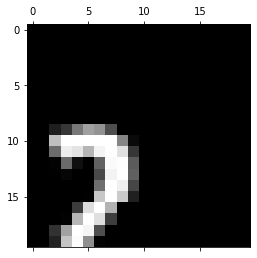

Predicted digit is : [[2]]


<Figure size 432x288 with 0 Axes>

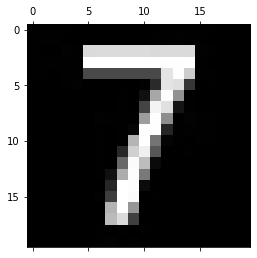

Predicted digit is : [[7]]


<Figure size 432x288 with 0 Axes>

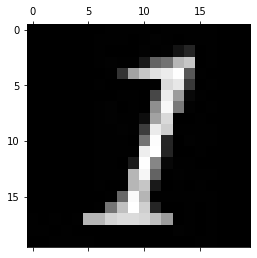

Predicted digit is : [[1]]


<Figure size 432x288 with 0 Axes>

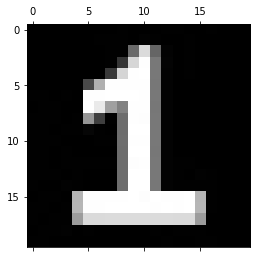

Predicted digit is : [[1]]


<Figure size 432x288 with 0 Axes>

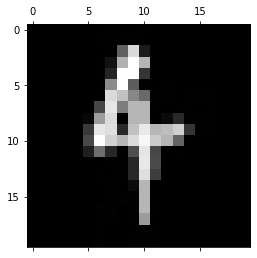

Predicted digit is : [[5]]


<Figure size 432x288 with 0 Axes>

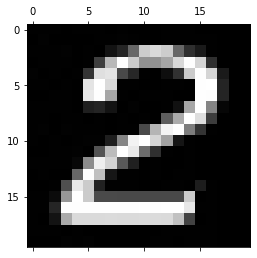

Predicted digit is : [[2]]


<Figure size 432x288 with 0 Axes>

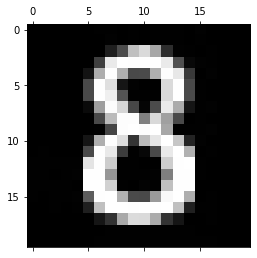

Predicted digit is : [[8]]


<Figure size 432x288 with 0 Axes>

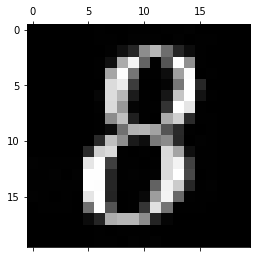

Predicted digit is : [[8]]


<Figure size 432x288 with 0 Axes>

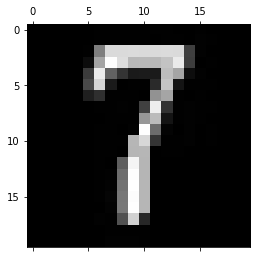

Predicted digit is : [[7]]


<Figure size 432x288 with 0 Axes>

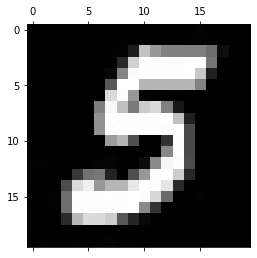

Predicted digit is : [[5]]


<Figure size 432x288 with 0 Axes>

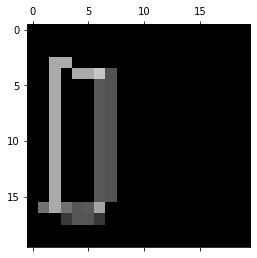

Predicted digit is : [[4]]


<Figure size 432x288 with 0 Axes>

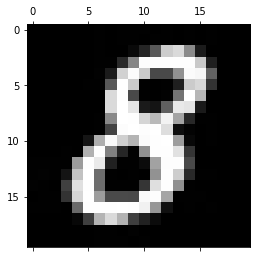

Predicted digit is : [[8]]


<Figure size 432x288 with 0 Axes>

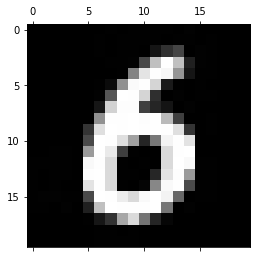

Predicted digit is : [[6]]


<Figure size 432x288 with 0 Axes>

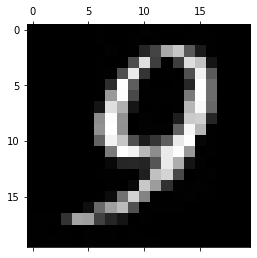

Predicted digit is : [[9]]


<Figure size 432x288 with 0 Axes>

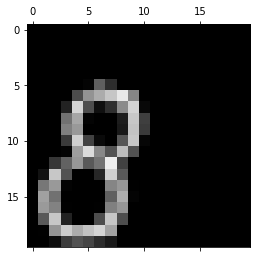

Predicted digit is : [[8]]


In [0]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])

predictions_train_L = predict_L_layer(X_train, parameters)
print("Training Accuracy : "+ str(np.sum(predictions_train_L==y_train)/y_train.shape[1] * 100)+" %")
predictions_test_L=predict_L_layer(X_test,parameters)
print("Testing Accuracy : "+ str(np.sum(predictions_test_L==y_test)/y_test.shape[1] * 100)+" %")

import random
import pylab as pl

for j in range(15):
    i=random.randint(0,n_samples)
    pl.gray()
    pl.matshow(np.array(Data)[i])
    cv2_imshow(np.array(Data)[i])
    pl.show()
    img=np.array(Data)[i].reshape((1200,1)).T
    img = sc.transform(img)
    img=img.T
    predicted_digit=predict_L_layer(img,parameters)
    print('Predicted digit is : '+str(predicted_digit))
    #print('True digit is: '+ str(y[i]))

Training Accuracy : 71.49695078712239 %
Testing Accuracy : 69.82416335791265 %


<Figure size 432x288 with 0 Axes>

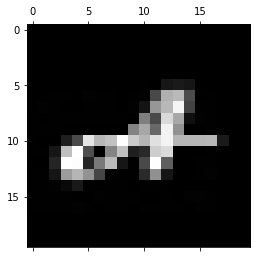

Predicted Character is : [[22]]
True Character is: 10


<Figure size 432x288 with 0 Axes>

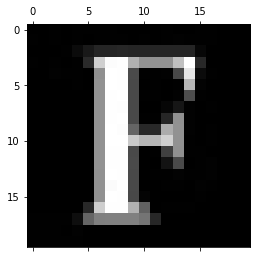

Predicted Character is : [[15]]
True Character is: 15


<Figure size 432x288 with 0 Axes>

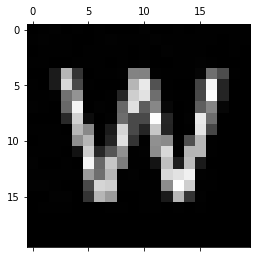

Predicted Character is : [[32]]
True Character is: 32


<Figure size 432x288 with 0 Axes>

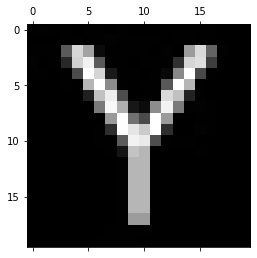

Predicted Character is : [[34]]
True Character is: 34


<Figure size 432x288 with 0 Axes>

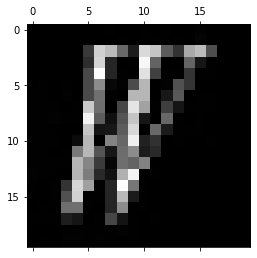

Predicted Character is : [[29]]
True Character is: 32


<Figure size 432x288 with 0 Axes>

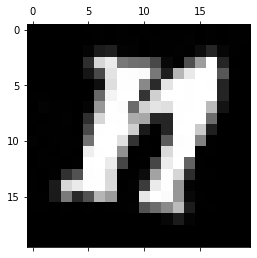

Predicted Character is : [[17]]
True Character is: 23


<Figure size 432x288 with 0 Axes>

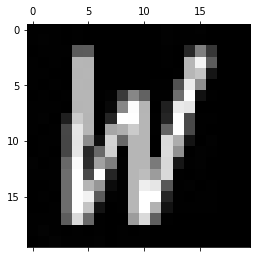

Predicted Character is : [[31]]
True Character is: 32


<Figure size 432x288 with 0 Axes>

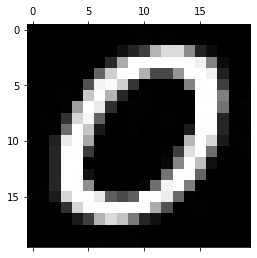

Predicted Character is : [[24]]
True Character is: 24


<Figure size 432x288 with 0 Axes>

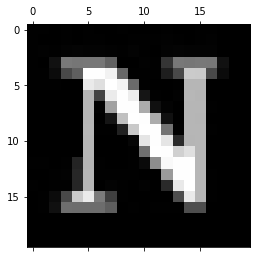

Predicted Character is : [[23]]
True Character is: 23


<Figure size 432x288 with 0 Axes>

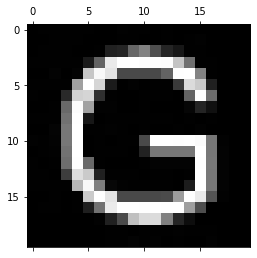

Predicted Character is : [[16]]
True Character is: 16


<Figure size 432x288 with 0 Axes>

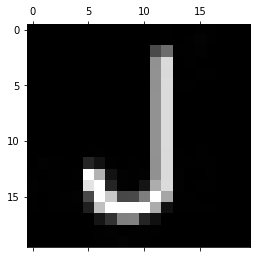

Predicted Character is : [[19]]
True Character is: 19


<Figure size 432x288 with 0 Axes>

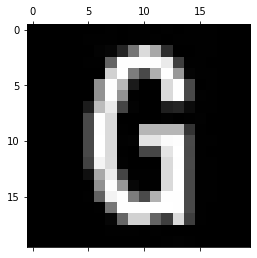

Predicted Character is : [[28]]
True Character is: 16


<Figure size 432x288 with 0 Axes>

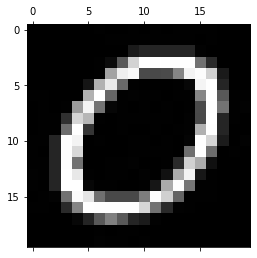

Predicted Character is : [[24]]
True Character is: 24


<Figure size 432x288 with 0 Axes>

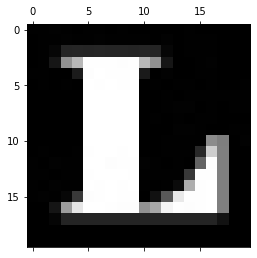

Predicted Character is : [[21]]
True Character is: 21


<Figure size 432x288 with 0 Axes>

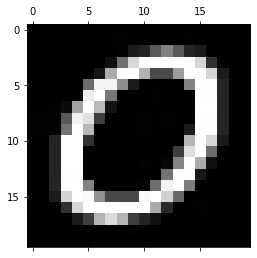

Predicted Character is : [[24]]
True Character is: 24


In [0]:

predictions_train_L = predict_L_layer(X_train_Chars, parameters_Chars)
print("Training Accuracy : "+ str(np.sum(predictions_train_L==y_train_Chars)/y_train_Chars.shape[1] * 100)+" %")
predictions_test_L=predict_L_layer(X_test_Chars,parameters_Chars)
print("Testing Accuracy : "+ str(np.sum(predictions_test_L==y_test_Chars)/y_test_Chars.shape[1] * 100)+" %")

import random
import pylab as pl

for j in range(15):
    i=random.randint(0,n_samples)
    pl.gray()
    pl.matshow(np.array(Data_Chars)[i])
    cv2_imshow(np.array(Data_Chars)[i])
    pl.show()
    img=np.array(Data_Chars)[i].reshape((1200,1)).T
    img = sc.transform(img)
    img=img.T
    predicted_Char=predict_L_layer(img,parameters_Chars)
    print('Predicted Character is : '+str(predicted_Char))
    print('True Character is: '+ str(y_Chars[i]))

<Figure size 432x288 with 0 Axes>

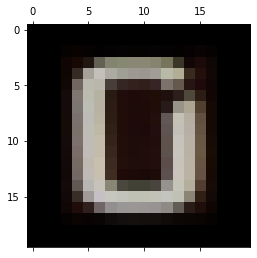

Predicted Digit is : 0


<Figure size 432x288 with 0 Axes>

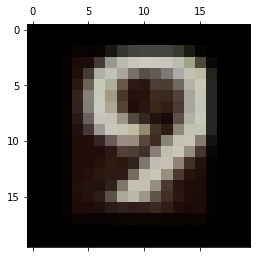

Predicted Digit is : 9


<Figure size 432x288 with 0 Axes>

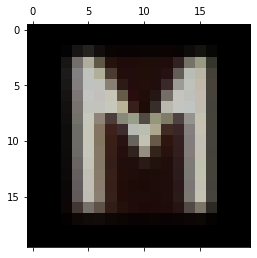

Predicted Character is : H


<Figure size 432x288 with 0 Axes>

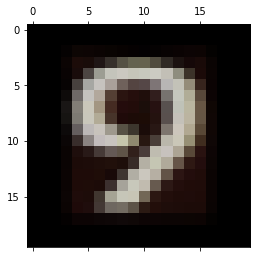

Predicted Digit is : 9


<Figure size 432x288 with 0 Axes>

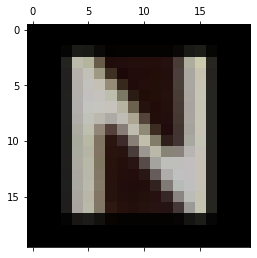

Predicted Character is : N


<Figure size 432x288 with 0 Axes>

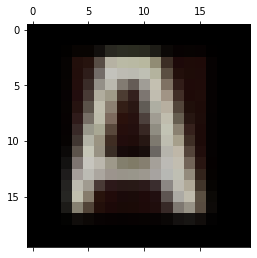

Predicted Character is : A


<Figure size 432x288 with 0 Axes>

In [0]:
PredictedDigits=[]
PredictedChars=[]
Charx=[]
Chary=[]
Digitx=[]
Digity=[]
for i in range(len(croppedimages)):
    DirectImg=croppedimages[i]

    Padded=cv2.copyMakeBorder(
                    DirectImg, 
                    4, 
                    4, 
                    4, 
                    4, 
                    cv2.BORDER_CONSTANT,
                    value=[255,255,255]
                  )


    tasvir=cv2.resize(Padded,(20,20),interpolation = cv2.INTER_AREA)
    tasvir=cv2.bitwise_not(tasvir)
    pl.gray()
    img=tasvir.reshape((1200,1)).T
    img = sc.transform(img)
    img=img.T
    
    if ys[i]>newimg.shape[0]/2 and xs[i]>(newimg.shape[1]/4) and xs[i]<(newimg.shape[1]-newimg.shape[1]/3):
     Rep=False
     if i!=0:
        for j in range(len(Digitx)):
          if (abs(xs[i]-Digitx[j])<=3 and abs(ys[i]-Digity[j])<=3) or (xs[i] == Digitx[j]):
            Rep=True
     if Rep==False:
     #if 1==1:
            cv2_imshow(tasvir)
            pl.matshow(tasvir)
            pl.show()
            Predicted_digit=predict_L_layer(img,parameters)
            PredictedDigits.append(Predicted_digit[0][0])
            print('Predicted Digit is : '+str(Predicted_digit[0][0]))
            Digitx.append(xs[i])
            Digity.append(ys[i])
    elif xs[i]>(newimg.shape[1]/4) and xs[i]<(newimg.shape[1]-newimg.shape[1]/3):
     Rep=False
     if i!=0:
        for j in range(len(Charx)):
          if (abs(xs[i]-Charx[j])<=3 and abs(ys[i]-Chary[j])<=3) or (xs[i] == Charx[j]):
            Rep=True
     if Rep==False:
     #if 1==1:
            cv2_imshow(tasvir)
            pl.matshow(tasvir)
            pl.show()
            predicted_Char=predict_L_layer(img,parameters_Chars)
            PredictedChars.append(predicted_Char[0][0])
            print('Predicted Character is : '+Dict[str(predicted_Char[0][0])])
            Charx.append(xs[i])
            Chary.append(ys[i])
          

In [0]:
print(Digitx)
print(Charx)

[76, 60, 45]
[44, 61, 78]


In [0]:
print(Digity)
print(Chary)

[34, 35, 33]
[7, 8, 8]


In [0]:
Digits=np.array((PredictedDigits, Digitx))
Characters=np.array((PredictedChars, Charx))

LICENSEPLATE=[]

for i in Characters.T[Characters.T[:,1].argsort()]:
  LICENSEPLATE.append(Dict[str(i[0])])
  
for i in Digits.T[Digits.T[:,1].argsort()]:
  LICENSEPLATE.append(str(i[0]))


print(LICENSEPLATE)

['H', 'N', 'A', '9', '9', '0']
